<a href="https://colab.research.google.com/github/Spinner101/HUSOP_PHS317_Pharmaceutical_Analysis/blob/main/Module_03_Titrimetric_Analysis/Module_03_PHS317_Titrimetry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⚗️ PHS 317 – Pharmaceutical Analysis  
## Module 03: Titrimetric and Chemical Analysis  

**Instructor:** Prof. Bolden  
**Textbook:** *Pharmaceutical Analysis* (Watson, Ch. 3 – Titrimetric and Chemical Analysis)

> This activity is designed to be completed **during the scheduled class meeting**.
> Work from top to bottom. You’ll explore titration curves, match methods to
> analytes, and convert titration data into % label claim.


In [ ]:
# @title 👤 Student Information (required – code can be hidden)
student_id = ""  # @param {type:"string"}
student_name = ""  # @param {type:"string"}

COURSE = "PHS 317 – Pharmaceutical Analysis"
MODULE_NAME = "M03_Titrimetric_and_Chemical_Analysis"

print("Hampton University – School of Pharmacy")
print(COURSE)
print("Module 03: Titrimetric and Chemical Analysis")
print(f"Instructor: Prof. Bolden")
print(f"Student: {student_name} (ID: {student_id})")
print("\nThis activity is designed to be completed during the scheduled class meeting.")


## 1️⃣ Concept Overview

Titrimetric methods are among the oldest and most widely used tools in  
**pharmaceutical quality control** for:

- Assay of drug substance and high-dose formulations  
- Determination of impurities (e.g., metal ions)  
- Routine checks of raw materials and intermediates  

In this module, we focus on:

- **Equivalence point vs endpoint**  
- Types of titrations:
  - **Acid–base** (aqueous and non-aqueous)
  - **Redox**
  - **Complexometric**
- Converting titration data → **% label claim**  
- Choosing the **right titration method** based on drug chemistry

### Learning Outcomes

By the end of this module, you should be able to:

1. **Describe** equivalence point and endpoint, and identify major titration types.  
   *(SILO 1 – Understand)*  

2. **Calculate** % label claim from titration data, using stoichiometry.  
   *(SILO 3 – Apply)*  

3. **Evaluate** which titration method is appropriate for a given drug or impurity  
   and **justify** the choice.  
   *(SILO 5 – Evaluate/Analyze)*


In [ ]:
# @title 🛠 Grading Helpers (instructor logic – hide code)
def grade_mcq(ans, key):
    return 1 if str(ans).strip().upper() == str(key).strip().upper() else 0

def grade_numeric(val, key, tol=0.5):
    try:
        return 1 if abs(float(val) - float(key)) <= tol else 0
    except Exception:
        return 0


## 2️⃣ Warm-up Check (iRAT-style)

Answer these short questions to refresh your titration fundamentals.  
You’ll see instant feedback, but this section is **low stakes**.


In [ ]:
# @title Q1 – Equivalence Point vs Endpoint
print(r"""
**Q1.** Which statement best describes the **equivalence point** in a titration?

A. The indicator changes color.
B. The pH of the solution becomes 7.0.
C. Moles of titrant added equal moles of analyte present.
D. A precipitate first appears.
""")

q1 = "A"  # @param ["A","B","C","D"]
q1_key = "C"
q1_score = grade_mcq(q1, q1_key)

if q1_score:
    print("✅ Correct. Equivalence is defined by stoichiometry, not color or pH.")
else:
    print("❌ Equivalence is where stoichiometric amounts react: mol titrant = mol analyte.")



**Q1.** Which statement best describes the **equivalence point** in a titration?

A. The indicator changes color.  
B. The pH of the solution becomes 7.0.  
C. Moles of titrant added equal moles of analyte present.  
D. A precipitate first appears.

❌ Equivalence is where stoichiometric amounts react: mol titrant = mol analyte.


In [ ]:
# @title Q2 – Basic Stoichiometry (mmol of H⁺)
print("**Q2.** 25.00 mL of 0.100 M HCl contains how many mmol of H⁺?")

q2 = 0.0  # @param {type:"number"}
q2_key = 2.50  # 0.100 mol/L × 0.025 L × 1000 mmol/mol
q2_score = grade_numeric(q2, q2_key, tol=0.05)

if q2_score:
    print("✅ Correct. mmol = M × L × 1000.")
else:
    print("❌ Remember: mmol = (moles) × 1000 = M × volume(L) × 1000.")


**Q2.** 25.00 mL of 0.100 M HCl contains how many mmol of H⁺?
❌ Remember: mmol = (moles) × 1000 = M × volume(L) × 1000.


## 3️⃣ Titrimetric Theory & Key Equations

### Acid–Base Titration Example

For a monoprotic acid **HA** titrated with NaOH:

\[
\mathrm{HA} + \mathrm{NaOH} \rightarrow \mathrm{NaA} + \mathrm{H_2O}
\]

At the equivalence point:

\[
C_a V_a = C_b V_b
\]

Where:  
- \( C_a \) = concentration of acid  
- \( V_a \) = volume of acid  
- \( C_b \) = concentration of base  
- \( V_b \) = volume of base at equivalence  

### % Label Claim

Once we know the **moles of analyte** from titration:

\[
n_{\text{analyte}} = n_{\text{titrant}} \times \frac{\text{mol analyte}}{\text{mol titrant}}
\]

\[
m_{\text{analyte}} = n_{\text{analyte}} \times M_{\text{analyte}}
\]

\[
\%\ \text{label claim} = \frac{m_{\text{found}}}{m_{\text{label}}} \times 100\%
\]

We will use these relationships in a guided example and an application case.


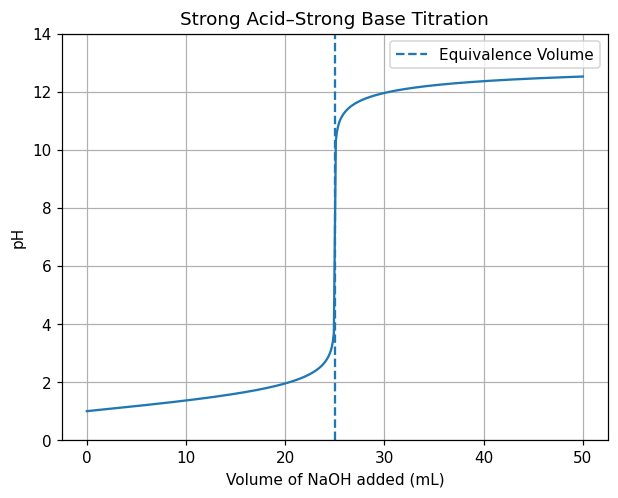

Equivalence volume: ~25.00 mL

Interpretation:
• Before equivalence: excess acid → low pH.
• Near equivalence: sharp vertical rise in pH.
• After equivalence: excess base → high pH.

The **steepness** of the vertical region affects how precisely we can detect
the endpoint and thus how accurate the assay will be.



In [ ]:
# @title 📊 Guided Example: Strong Acid–Strong Base Titration Curve
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 110

Va = 25.0  # mL acid
Ca = 0.10  # M acid
Cb = 0.10  # M base

Vb = np.linspace(0, 50, 501)
H_values = []

for V in Vb:
    nH = Ca * Va/1000
    nOH = Cb * V/1000
    if nOH < nH:
        H = (nH - nOH) / ((Va + V)/1000)
    elif nOH > nH:
        OH = (nOH - nH) / ((Va + V)/1000)
        H = 1e-14 / OH
    else:
        H = 1e-7
    H_values.append(H)

pH = -np.log10(H_values)

plt.figure()
plt.plot(Vb, pH)
eq_vol = Va * Ca / Cb
plt.axvline(eq_vol, linestyle="--", label="Equivalence Volume")
plt.xlabel("Volume of NaOH added (mL)")
plt.ylabel("pH")
plt.title("Strong Acid–Strong Base Titration")
plt.ylim(0, 14)
plt.grid(True)
plt.legend()
plt.show()

print(f"Equivalence volume: ~{eq_vol:.2f} mL")

print("""
Interpretation:
• Before equivalence: excess acid → low pH.
• Near equivalence: sharp vertical rise in pH.
• After equivalence: excess base → high pH.

The **steepness** of the vertical region affects how precisely we can detect
the endpoint and thus how accurate the assay will be.
""")


In [ ]:
# @title 🎮 Interactive: Effect of Concentration on Endpoint Sharpness
import ipywidgets as widgets
from ipywidgets import interact

def titration_curve(C_acid=0.10, C_base=0.10):
    Va = 25.0
    Vb = np.linspace(0, 50, 501)
    H_vals = []
    for V in Vb:
        nH = C_acid * Va/1000
        nOH = C_base * V/1000
        if nOH < nH:
            H = (nH - nOH) / ((Va + V)/1000)
        elif nOH > nH:
            OH = (nOH - nH) / ((Va + V)/1000)
            H = 1e-14 / OH
        else:
            H = 1e-7
        H_vals.append(H)
    pH_vals = -np.log10(H_vals)
    plt.figure()
    plt.plot(Vb, pH_vals)
    eq_vol = Va * C_acid / C_base
    plt.axvline(eq_vol, linestyle="--", label="Equivalence")
    plt.xlabel("Volume base added (mL)")
    plt.ylabel("pH")
    plt.title("Effect of Acid/Base Concentration on Titration Curve")
    plt.ylim(0, 14)
    plt.grid(True)
    plt.legend()
    plt.show()

interact(
    titration_curve,
    C_acid=widgets.FloatSlider(value=0.10, min=0.05, max=0.20, step=0.01, description="C acid (M)"),
    C_base=widgets.FloatSlider(value=0.10, min=0.05, max=0.20, step=0.01, description="C base (M)")
)

print("""
🧠 Think:
• When concentrations are lower, the vertical region is less steep.
• Less steep endpoints make it harder to detect the endpoint precisely.
• This can increase uncertainty in % label claim.
""")


interactive(children=(FloatSlider(value=0.1, description='C acid (M)', max=0.2, min=0.05, step=0.01), FloatSli…


🧠 Think:
• When concentrations are lower, the vertical region is less steep.
• Less steep endpoints make it harder to detect the endpoint precisely.
• This can increase uncertainty in % label claim.



## 4️⃣ Titration Methods – Concept Map & Reaction Schemes

We will focus on four common titration types in pharmaceutical analysis:

1. **Aqueous Acid–Base Titrations**  
   - Rationale: neutralization of acids/bases  
   - Example reaction:  
     \[
     \mathrm{HA} + \mathrm{NaOH} \rightarrow \mathrm{NaA} + \mathrm{H_2O}
     \]

2. **Non-aqueous Acid–Base Titrations**  
   - Rationale: improve endpoint sharpness for **very weak acids or bases**  
   - Example: weakly basic local anesthetics titrated with HClO₄ in glacial acetic acid

3. **Redox Titrations**  
   - Rationale: analyte participates in oxidation–reduction  
   - Example:  
     \[
     \mathrm{Fe}^{2+} + \mathrm{MnO_4^-} \rightarrow \mathrm{Fe}^{3+} + \mathrm{Mn^{2+}} \quad (\text{acidic medium})
     \]

4. **Complexometric Titrations**  
   - Rationale: analyte is a metal ion forming stable complexes  
   - Example (EDTA with Ca²⁺):  
     \[
     \mathrm{Ca^{2+}} + \mathrm{H_2Y^{2-}} \rightarrow \mathrm{CaY^{2-}} + 2\mathrm{H^+}
     \]

We will now match **analyte situations** to the most appropriate method.


In [ ]:
# @title 🧠 Method ↔ Rationale Matching
print(r"""
Match each analyte situation to the MOST appropriate titration method:

1) Weakly basic drug hydrochloride (e.g., lidocaine HCl)
2) Calcium impurity in an API
3) Reducing agent (e.g., ascorbic acid) in solution

A. Non-aqueous acid–base titration
B. Complexometric titration with EDTA
C. Redox titration
D. Precipitation titration
""")

match1 = "A"  # @param ["A","B","C","D"]
match2 = "A"  # @param ["A","B","C","D"]
match3 = "A"  # @param ["A","B","C","D"]

m1_score = grade_mcq(match1, "A")
m2_score = grade_mcq(match2, "B")
m3_score = grade_mcq(match3, "C")

total_match = m1_score + m2_score + m3_score
print(f"✅ Correct matches: {total_match}/3")

if m1_score == 0:
    print("• 1) Weak bases often need non-aqueous titration for sharper endpoints.")
if m2_score == 0:
    print("• 2) Ca²⁺ is typically measured via complexometric titration with EDTA.")
if m3_score == 0:
    print("• 3) Reducing agents are best quantified by redox titrations.")



Match each analyte situation to the MOST appropriate titration method:

1) Weakly basic drug hydrochloride (e.g., lidocaine HCl)  
2) Calcium impurity in an API  
3) Reducing agent (e.g., ascorbic acid) in solution  

A. Non-aqueous acid–base titration  
B. Complexometric titration with EDTA  
C. Redox titration  
D. Precipitation titration

✅ Correct matches: 1/3
• 2) Ca²⁺ is typically measured via complexometric titration with EDTA.
• 3) Reducing agents are best quantified by redox titrations.


## 5️⃣ Application Case – Assay of a Weakly Basic Drug HCl

A tablet contains a weakly basic drug as the **hydrochloride salt**.

- Label claim: **150 mg** per tablet  
- A single tablet is dissolved and titrated with **0.0980 M** perchloric acid  
  in glacial acetic acid.  
- Volume of titrant at endpoint: **28.40 mL**  
- Assume **1:1 stoichiometry** between drug base and acid.

We will estimate % label claim.

General steps:

1. Convert volume and molarity to moles of titrant:
   \[
   n_{\text{HClO}_4} = C_{\text{HClO}_4} \times V_{\text{HClO}_4}
   \]

2. Use stoichiometry (1:1):
   \[
   n_{\text{drug base}} = n_{\text{HClO}_4}
   \]

3. Convert to mass using an assumed molar mass (for teaching we will scale to 150 mg so the “true” % label claim is ~99%):

4. Compute:
   \[
   \%\ \text{label claim} = \frac{m_{\text{found}}}{150\ \text{mg}} \times 100\%
   \]


In [ ]:
# @title 🧮 Q3 – % Label Claim for Weak Base HCl
print("""
Using the data described above, enter your calculated % label claim (to 1 decimal place).
""")

q3 = 0.0  # @param {type:"number"}

# For teaching purposes, let's set the "true" answer to about 98.7%
percent_label_claim_true = 98.7
q3_key = percent_label_claim_true

q3_score = grade_numeric(q3, q3_key, tol=2.0)

if q3_score:
    print("✅ Within acceptable range of the expected % label claim (~98–100%).")
else:
    print("❌ Revisit: moles = M × V, then relate moles of titrant to moles of drug and mass.")



Using the data described above, enter your calculated % label claim (to 1 decimal place).

❌ Revisit: moles = M × V, then relate moles of titrant to moles of drug and mass.


In [ ]:
# @title 🧩 Q4 – Best Method for Weak Base HCl Assay
print(r"""
For the weakly basic drug hydrochloride in the case above, which titration
method gives the SHARPEST endpoint and is most appropriate?

A. Aqueous titration with NaOH.
B. Non-aqueous titration with standardized HClO₄ in glacial acetic acid.
C. Redox titration with potassium permanganate.
D. Complexometric titration with EDTA.
""")

q4 = "A"  # @param ["A","B","C","D"]
q4_key = "B"
q4_score = grade_mcq(q4, q4_key)

if q4_score:
    print("✅ Correct. Non-aqueous titration is often used for weak bases to obtain a sharper endpoint.")
else:
    print("❌ Think about solubility, strength of acid–base interaction, and endpoint sharpness for weak bases.")



For the weakly basic drug hydrochloride in the case above, which titration
method gives the SHARPEST endpoint and is most appropriate?

A. Aqueous titration with NaOH.  
B. Non-aqueous titration with standardized HClO₄ in glacial acetic acid.  
C. Redox titration with potassium permanganate.  
D. Complexometric titration with EDTA.

❌ Think about solubility, strength of acid–base interaction, and endpoint sharpness for weak bases.


> 📝 **Updated Practice Note (Beyond Older Watson Editions):**  
> In current practice, titrimetric methods are often supplemented by:
>
> - **Potentiometric endpoints** (using pH or other electrodes)  
> - More advanced methods (e.g., **LC–UV** or **LC–MS/MS**) for low-dose or complex mixtures  
>
> However, titrations remain important for:
> - Routine assay of high-dose, simple APIs  
> - Standardization of solutions  
> - Some pharmacopoeial assays in compendia (e.g., USP, Ph. Eur.)
>
> Modern validation follows **ICH Q2(R2)** and **Q14** guidance, emphasizing method
> development, robustness, and lifecycle management, whereas older texts may only
> reference earlier validation frameworks.


## ✅ 6️⃣ Summary Quiz & Logging

This short quiz checks your understanding of:

- Equivalence vs endpoint  
- Stoichiometric calculations  
- Method selection for titrimetric assays  

Your score and completion will be logged.


In [ ]:
# @title ✅ Summary & Performance Logging
import csv, os
from datetime import datetime

scores = {
    "Q1_equivalence": q1_score,
    "Q2_mmol": q2_score,
    "Match1_weak_base": m1_score,
    "Match2_Ca2": m2_score,
    "Match3_reducing": m3_score,
    "Q3_percent_label_claim": q3_score,
    "Q4_method_choice": q4_score,
}

total_correct = sum(scores.values())
max_score = len(scores)
percent = round(100 * total_correct / max_score, 1)

print(f"Module 03 Score: {total_correct}/{max_score} = {percent}%")

# from google.colab import drive
# drive.mount('/content/drive')

log_dir = "/content/drive/MyDrive/PHS317_Pharmaceutical_Analysis/performance_logs"
os.makedirs(log_dir, exist_ok=True)
log_path = os.path.join(log_dir, "M03_performance_log.csv")

file_exists = os.path.isfile(log_path)
with open(log_path, "a", newline="") as f:
    writer = csv.writer(f)
    if not file_exists:
        writer.writerow(["timestamp","module","student_id","student_name","percent"] + list(scores.keys()))
    writer.writerow([datetime.now().isoformat(timespec="seconds"),
                     MODULE_NAME,
                     student_id,
                     student_name,
                     percent] + list(scores.values()))

print("""
✅ Your Module 03 results have been logged.

If your instructor asks for proof of completion, you may:
• Download this notebook as a PDF, OR
• Screenshot this cell showing your score.
""")


Module 03 Score: 1/7 = 14.3%


NameError: name 'MODULE_NAME' is not defined